# Lecture Notes 2: Numpy, Timing, Plotting

# Numpy

## Basics

In [1]:
# Import the module such that we can use the built-in functionality
import numpy as np # as alias or shortcut 

### Numpy arrays

In [2]:
X = np.array([1, 2, 3, 4])
Y = np.array([5, 6.5, 7, 8])
print(type(X),X) 
print(type(Y),Y)

<class 'numpy.ndarray'> [1 2 3 4]
<class 'numpy.ndarray'> [5.  6.5 7.  8. ]


### Numpy data types

In [3]:
# Data type is estimated from the inputs
print(X.dtype, Y.dtype, '<-- Equivalent to long and double types in other languages')

int64 float64 <-- Equivalent to long and double types in other languages


In [4]:
# Data type can be changed explicitly to be e.g float64 (casting) as following
X = X.astype(np.float)

# or specified during the creation
X = np.array([1,2,3,4], dtype=np.int32) # half precision integer
X.dtype, X

(dtype('int32'), array([1, 2, 3, 4], dtype=int32))

**Casting**

When applying an operator to two arrays of different types, the returned array retains the type of the highest-precision input array (here, float64).

In [5]:
(X + Y).dtype

dtype('float64')

### Operations between arrays

In [6]:
A = X + Y            # element-wise addition
M = X * Y            # element-wise multiplication
D = np.dot(X, Y)  # dot product
T = X.T              # transposing
X_tail = X[2:]       # indexing (similar to lists)
X_range = X[1:4]     # range selection (similar to lists)
A, M, D, T, X_tail, X_range

(array([ 6. ,  8.5, 10. , 12. ]),
 array([ 5., 13., 21., 32.]),
 71.0,
 array([1, 2, 3, 4], dtype=int32),
 array([3, 4], dtype=int32),
 array([2, 3, 4], dtype=int32))

In [7]:
# Compare this to operations on lists
X_list = [1, 2, 3, 4]
Y_list = [5, 6, 7, 8]
print(X_list + Y_list)
print(X_list * Y_list) #  -> raises Exception

[1, 2, 3, 4, 5, 6, 7, 8]


TypeError: can't multiply sequence by non-int of type 'list'

### Equivalent operations with list comprehansions

In [20]:
A_list = [x + y for x, y in zip(X, Y)]      # element-wise addition
M_list = [x * y for x, y in zip(X, Y)]      # element-wise multiplication
D_list = sum([x * y for x, y in zip(X, Y)]) # dot product for two vectors

A_list, M_list, D_list

([array([11.575,  9.98 ]),
  array([12.921, 15.64 ]),
  array([14.185, 11.03 ]),
  array([14.998, 10.94 ])],
 [array([32.875, 24.9  ]),
  array([41.7365, 59.41  ]),
  array([50.295, 28.21 ]),
  array([55.984, 23.52 ])],
 array([180.8905, 136.04  ]))

**Observation:** Results are the same, but the Numpy syntax is much more readable (i.e. more compact) than the Python syntax for the same vector operations.

### Shapes of arrays

In [21]:
# Vector, scalar shape
print(A.shape, D.shape)

(4,) ()


In [22]:
# Specify a row vector
A_row = A[None]
print(A_row.shape)
print(A_row)

(1, 4)
[[ 6.   8.5 10.  12. ]]


In [23]:
# Specify a column vector
A_column = A[:,None]
print(A_column.shape)
print(A_column)

(4, 1)
[[ 6. ]
 [ 8.5]
 [10. ]
 [12. ]]


## Matrices

In [24]:
A = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

In [25]:
print(A)
print(10 * "--")
print(A.shape, A.dtype)

[[1 2 3]
 [4 5 6]]
--------------------
(2, 3) int64


In [26]:
# Elementwise multiplication
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

### Matrix-matrix multiplication

In [27]:
np.dot(A, A)  # -> raises Exception because of the wrong inner dimensions

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [28]:
# we need to transpose the second matrix for the same dimensions
print(np.dot(A, A.T))
print(10 * "--")
# In case A is already a ndarray object there are equivalents
print(A.dot(A.T))
print(10 * '--')
print(A @ A.T) # works only for latest python versions

[[14 32]
 [32 77]]
--------------------
[[14 32]
 [32 77]]
--------------------
[[14 32]
 [32 77]]


**Observation:** Unlike Matlab, "*" denotes an element-wise multiplication. Matrix multiplication is instead implemented by the function "dot".

### Build-in matrix creation functions

In [29]:
# All ones with the given shape
A_o = np.ones(shape=(3,2))
A_o

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [30]:
# All zeros with the given shape
A_z = np.zeros((2,3))
A_z

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
# Some values currently stored in the memory to be overwritten later anyways
A_e = np.empty((3,4))
A_e

array([[4.68450504e-310, 4.94065646e-324, 0.00000000e+000,
        0.00000000e+000],
       [4.68450481e-310, 7.16395186e-322, 4.68450508e-310,
        6.90016865e-310],
       [5.53353523e-322, 5.53353523e-322, 0.00000000e+000,
        3.16202013e-322]])

**Further numpy array attributes**

In [32]:
A = np.ones((3,3,3))
print((A.size, A.ndim) ,'<- Number of elements and number of axis')

(27, 3) <- Number of elements and number of axis


## Performance evaluation

To verify that in addition to the more compact syntax, Numpy also provides a computational benefit over standard Python, we compare the running time of a similar computation performed in pure Python and in Numpy. The module "time" provides a function "process_time" to measure the current time.

In [33]:
from time import process_time as clock
clock() # get an internal jupyter notebook clock time

1.023404465

we now wait a little bit...

In [34]:
clock()

1.031125654

and can observed that the value is higher than before (time has passed). We now define two functions to test the speed of matrix multiplication for two $n \times n$ matrices.

In [35]:
# pure Python implementation

def benchmark_py(n):
    
    # only initialization is done with numpy (time of the creation is not preserved)
    X = np.ones((n, n))
    Y = np.copy(X) # creates a copy of the given matrix
    Z = np.empty((n, n))
    
    # actual matrix multiplication
    start = clock()
    for i in range(n):
        for j in range(n):
            for k in range(n):
                Z[i,j] += X[i, k] * Y[k, j]
    end = clock()
    
    return end-start

In [36]:
# Numpy implementation

def benchmark_np(n):
    
    # same initialization as before
    X = np.ones((n, n))
    Y = np.ones_like(X) # matrix of the shape X with ones
    Z = np.empty_like(X) # same but with empty (any) values
    
    # actual matrix multiplication
    start = clock()
    Z = X @ Y
    end = clock()
    
    return end-start

Evaluating this function for $n=100$ iterations, we can observe that Numpy is much faster than pure Python.

In [37]:
num_iterations = 100
t_py = benchmark_py(num_iterations)
t_np = benchmark_np(num_iterations)
ratio = int(np.round(t_py/t_np)) # drop floating point part 
print(f'Numpy is approx {ratio} times faster then Python')

Numpy is approx 195 times faster then Python


# Plotting

In machine learning, it is often necessary to visualize the data, or to plot properties of algorithms such as their accuracy or their speed. For this, we can make use of the matplotlib library, which we load with the following sequence of commands.

In [38]:
import matplotlib
import matplotlib.pyplot as plt
# Needed in Jupyter Notebook
%matplotlib inline

## Basic plot

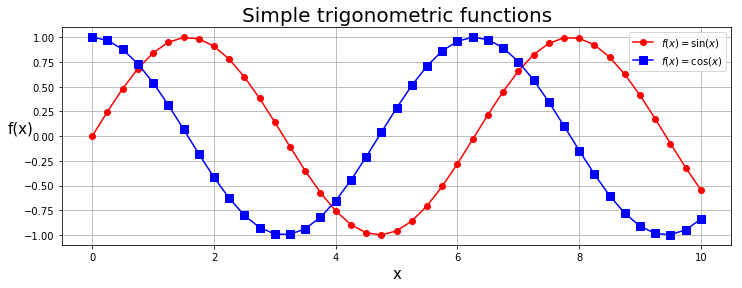

In [39]:
# create some input data
x = np.arange(0, 10.001, 0.25) # similar to range function from pure Python

# elementwise sinus and cosinus functions
y = np.sin(x) 
z = np.cos(x)

# figure proportions (sizes)
plt.figure(figsize=(12,4))

# connected circles marker style
plt.plot(x, y, 'o-', color='red', label='$f(x) = \sin(x)$') # latex expressions for the labeling
# connected stars 
plt.plot(x, z, 's-', color='blue', label='$f(x) = \cos(x)$', ms=8)  # size of the markers

plt.legend()

plt.xlabel('x', fontsize=15) # fontsize
plt.ylabel('f(x)', fontsize=15, rotation=0) # lable rotation angle (default 90 degree)

plt.title('Simple trigonometric functions', fontsize=20)
plt.grid(True) # grid lines

**Plotting a performance curve for matrix multiplication**

We run the computation with different parameters (e.g. size of input arrays)

In [40]:
# (2,2,2,2,2,2,2,2) ** (1,2,3,4,5,6,7,8) <-- elementwise power operation
bases = 2 * np.ones(8).astype(np.int)
powers = np.arange(1,9,1) # similar to range(start, stop, step)
N = bases ** powers
N

array([  2,   4,   8,  16,  32,  64, 128, 256])

In [41]:
py_t = [benchmark_py(n) for n in N]
np_t = [benchmark_np(n) for n in N]

Then, we render the plot

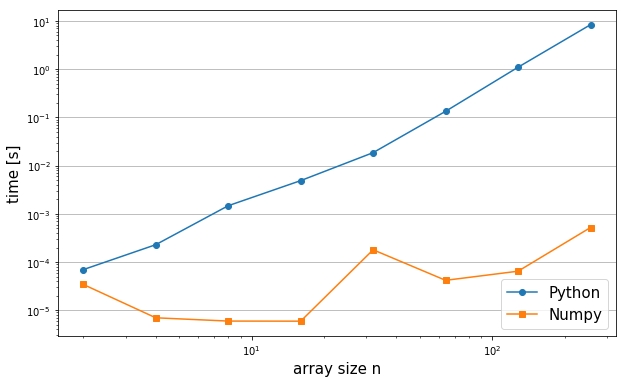

In [42]:
plt.figure(figsize=(10,6))
plt.plot(N, py_t, 'o-', label='Python')
plt.plot(N, np_t, 's-', label='Numpy')
plt.grid(axis='y') # grid with along an y axis
plt.xscale('log')
plt.yscale('log')
plt.xlabel('array size n', fontsize=15)
plt.ylabel('time [s]', fontsize=15)
_=plt.legend(loc='lower right', fontsize=15)

## Advanced Numpy

**Special Array Initializations**

Special numpy arrays (e.g. diagonal, identity, random, etc...) can be created easily.

In [43]:
A = np.diag((1.0, 2.0, 3.0)) # diagonal matrix
B = np.eye(3)                # identity matrix
C = np.random.rand(3, 3)     # random numbers of the given shapes
D = np.triu(C)               # upper triagonal matrix

print(A)
print(B)
print(C)
print(D)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.90314795 0.59529545 0.87835617]
 [0.90702683 0.4716584  0.71752835]
 [0.38648567 0.50889643 0.51152953]]
[[0.90314795 0.59529545 0.87835617]
 [0.         0.4716584  0.71752835]
 [0.         0.         0.51152953]]


**Reshaping and transposing**

In [44]:
A = np.arange(12)
print(A)
print(A.reshape((3,4)))
print(A.ravel()) # flattened a matrix to become a vector
print(A.T)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


**Broadcasting**

See also https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

![Numpy broadcasting](broad.jpg)

In [45]:
np.ones((3, 2)) + 1

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [46]:
np.ones((3, 2)) + np.ones((3, 2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [47]:
np.ones((3, 1)) + np.ones((1, 2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [48]:
np.ones((3, 1)) + np.ones((2))

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

### Matrix indexing and ranging

See also https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [49]:
A = np.arange(30).reshape(6, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


Select rows/columns

In [50]:
print(A[3, :])
print(A[:, 3])

[15 16 17 18 19]
[ 3  8 13 18 23 28]


Select window or complex ranging

In [51]:
print(A[1:5, 1:4])

[[ 6  7  8]
 [11 12 13]
 [16 17 18]
 [21 22 23]]


Select even rows and odd columns

In [52]:
print(A[::2, 1::2])

[[ 1  3]
 [11 13]
 [21 23]]


Select last two columns

In [53]:
print(A[:, -2:])

[[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]
 [28 29]]


Select column 1 and 4

In [54]:
print(A[:, [1, 4]])

[[ 1  4]
 [ 6  9]
 [11 14]
 [16 19]
 [21 24]
 [26 29]]


## Boolean Arrays

In [55]:
np.random.seed(1001) # fix the seed in order to get the same deterministic results
a = np.random.rand(4, 4)
print(a)
mask = a > 0.5
print(mask)
print(a[mask])

[[0.30623218 0.26506357 0.19606006 0.43052148]
 [0.02311355 0.19578192 0.35280529 0.22324202]
 [0.61352186 0.58045711 0.85356768 0.04113054]
 [0.48817444 0.92082616 0.10910188 0.41105662]]
[[False False False False]
 [False False False False]
 [ True  True  True False]
 [False  True False False]]
[0.61352186 0.58045711 0.85356768 0.92082616]


In [56]:
# Alternative numpy function
row_idx, col_idx = np.where(a > 0.5)
row_idx, col_idx

(array([2, 2, 2, 3]), array([0, 1, 2, 1]))

In [57]:
a[row_idx,col_idx]

array([0.61352186, 0.58045711, 0.85356768, 0.92082616])

## Getting help

In [58]:
help(np.argwhere) # 

Help on function argwhere in module numpy:

argwhere(a)
    Find the indices of array elements that are non-zero, grouped by element.
    
    Parameters
    ----------
    a : array_like
        Input data.
    
    Returns
    -------
    index_array : ndarray
        Indices of elements that are non-zero. Indices are grouped by element.
    
    See Also
    --------
    where, nonzero
    
    Notes
    -----
    ``np.argwhere(a)`` is the same as ``np.transpose(np.nonzero(a))``.
    
    The output of ``argwhere`` is not suitable for indexing arrays.
    For this purpose use ``nonzero(a)`` instead.
    
    Examples
    --------
    >>> x = np.arange(6).reshape(2,3)
    >>> x
    array([[0, 1, 2],
           [3, 4, 5]])
    >>> np.argwhere(x>1)
    array([[0, 2],
           [1, 0],
           [1, 1],
           [1, 2]])



In [59]:
# Is any/all of the elements True?
np.any(mask), np.all(mask)

(True, False)

In [60]:
# Apply to specific axes only
np.any(mask, axis=0) # axis 0 collapses (check over the columns)

array([ True,  True,  True, False])

In [61]:
np.any(mask, axis=1)# axis 1 collapses (check over the rows)

array([False, False,  True,  True])

# Analyzing a Dataset
Let's load the Boston dataset (506 examples composed of 13 features each).

In [62]:
# extract two interesting features of the data
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [63]:
X = boston['data'] # collect the data
print(X.shape)

(506, 13)


In [64]:
F = boston['feature_names']
print(F)
print(F.shape)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(13,)


**Reduce-type operations**

In [65]:
print(X.mean())                              # Global dataset mean feature value
print(X[:, 0].mean())                        # Mean of first feature (CRIM)

70.07396704469443
3.613523557312254


In [66]:
#Mean of all features over specific axis
X.mean(axis=0)

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [67]:
# Standard deviation of all features
X.std(axis=0)

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00])

In [68]:
# Sum over specific axis
X.sum(axis=0)

array([1.82844292e+03, 5.75000000e+03, 5.63521000e+03, 3.50000000e+01,
       2.80675700e+02, 3.18002500e+03, 3.46989000e+04, 1.92029160e+03,
       4.83200000e+03, 2.06568000e+05, 9.33850000e+03, 1.80477060e+05,
       6.40245000e+03])

In [69]:
# no axis is collapsed
X.sum(axis=0, keepdims=True).shape

(1, 13)

In [70]:
# Extreme values
print(f"Min value: {X.min()} at position {X.argmin()}")      
print(f"Max value: {X.max()} at position {X.argmax()}") 

Min value: 0.0 at position 3
Max value: 711.0 at position 6353


In [71]:
# Show the feature name along with the rounded mean and standard deviation
list(zip(F, X.mean(axis=0).round(3), X.std(axis=0).round(1)))

[('CRIM', 3.614, 8.6),
 ('ZN', 11.364, 23.3),
 ('INDUS', 11.137, 6.9),
 ('CHAS', 0.069, 0.3),
 ('NOX', 0.555, 0.1),
 ('RM', 6.285, 0.7),
 ('AGE', 68.575, 28.1),
 ('DIS', 3.795, 2.1),
 ('RAD', 9.549, 8.7),
 ('TAX', 408.237, 168.4),
 ('PTRATIO', 18.456, 2.2),
 ('B', 356.674, 91.2),
 ('LSTAT', 12.653, 7.1)]

**Retain two interesting features (5 and 12 columns)**

In [72]:
X = X[:, [5, 12]]
print(X.shape)

(506, 2)


**Scatter-plot the first two dimensions**

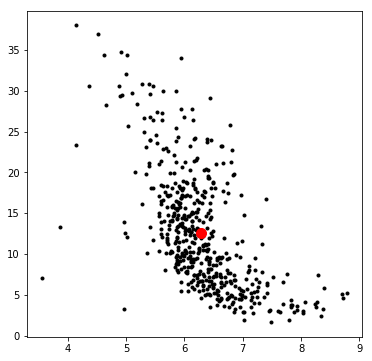

In [73]:
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], 'o', color='k', ms=3)
_=plt.plot(X[:, 0].mean(), X[:, 1].mean(), 'o', color='red', ms=10)

**Normalize the data**

In [74]:
X_norm = X - X.mean(axis=0) # center around origin
X_norm /= X.std(axis=0)  # rescale features so that they have standard deviation 1 in each dimension

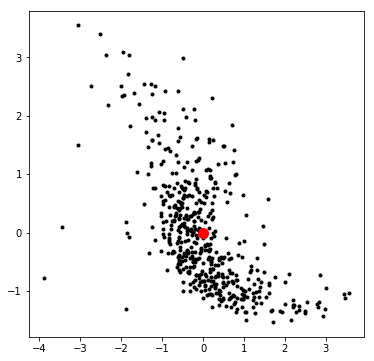

In [75]:
plt.figure(figsize=(6, 6))
plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', color='black', ms=3)
plt.plot(X_norm[:, 0].mean(), X_norm[:, 1].mean(), 'o', color='red', ms=10)

**Computing a distance matrix**

In [90]:
import scipy
import scipy.spatial

D = scipy.spatial.distance.cdist(X_norm, X_norm, metric='euclidean')
D.shape

(506, 506)

#### Alternative way of computing a distance matrix by broadcasting

In [95]:
#        (N,1,d) - (1,N,d) -> (N,N,d)
Dalt = ((X_norm[:,None] - X_norm[None]) ** 2).sum(2) ** 0.5
        
print(((Dalt - D) ** 2).mean())

1.3079359016060669e-33


**Highlighting nearby data points**

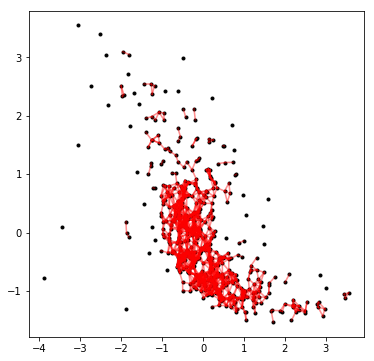

In [96]:
plt.figure(figsize=(6, 6))

ind = np.where(D < 0.2)

plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', color='black', ms=3)

for i1,i2 in zip(*ind):
    plt.plot([X_norm[i1, 0], X_norm[i2, 0]], [X_norm[i1, 1], X_norm[i2, 1]], color='red', alpha=0.25)